# CONSOMMATION ÉLECTRIQUE DES HAUTS DE FRANCE

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [49]:
df = pd.read_csv('consommation-quotidienne-brute-regionale.csv', sep=';')

In [50]:
# Sélectionner les lignes correspondant à la région Hauts-de-France
df_haut_de_france = df.loc[df['region'] == 'Hauts-de-France'].reset_index(drop=True)

In [51]:
df_haut_de_france = df_haut_de_france[['date_heure', 'date', 'consommation_brute_electricite_rte']]

In [52]:
df = df_haut_de_france.copy()

In [53]:
df_test = df_haut_de_france.copy()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183983 entries, 0 to 183982
Data columns (total 3 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   date_heure                          183983 non-null  object
 1   date                                183983 non-null  object
 2   consommation_brute_electricite_rte  183983 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [55]:
df

,date_heure,date,consommation_brute_electricite_rte
0,2013-01-21T11:00:00+01:00,2013-01-21,8514
1,2013-01-21T19:00:00+01:00,2013-01-21,8797
2,2013-01-21T20:00:00+01:00,2013-01-21,8567
3,2013-01-21T21:00:00+01:00,2013-01-21,8009
4,2013-01-21T23:00:00+01:00,2013-01-21,7541
...,...,...,...
183978,2023-06-23T07:30:00+02:00,2023-06-23,5940
183979,2023-06-23T10:00:00+02:00,2023-06-23,5095
183980,2023-06-23T11:30:00+02:00,2023-06-23,4983
183981,2023-06-23T12:30:00+02:00,2023-06-23,5464


## 1. A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.

<Axes: xlabel='date'>

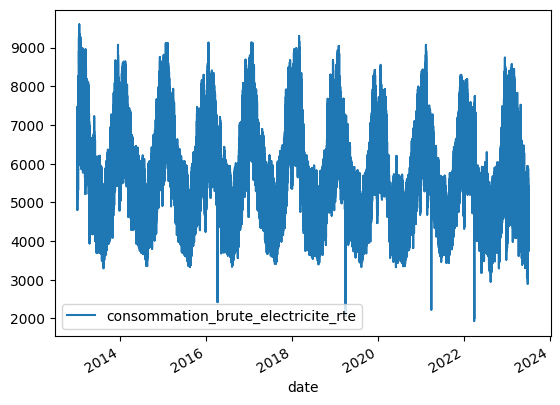

In [66]:
df.plot()

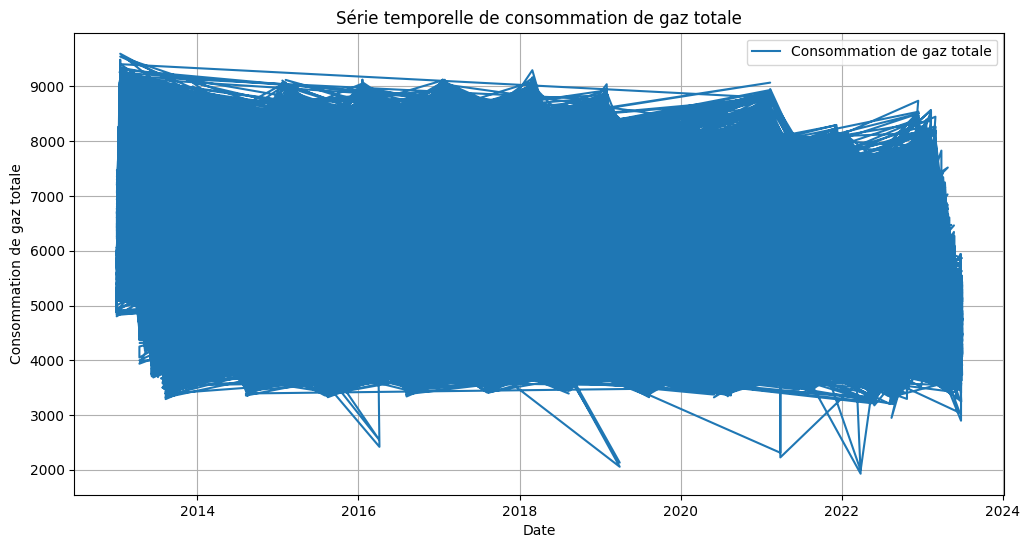

In [56]:
# Assurez-vous que la colonne de date est correctement traitée comme datetime
df['date'] = pd.to_datetime(df['date'])

# Définir la colonne de date comme index (si elle ne l'est pas déjà)
df.set_index('date', inplace=True)

# Tracer la série temporelle en utilisant la date comme abscisse
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['consommation_brute_electricite_rte'], label='Consommation de gaz totale')
plt.xlabel('Date')
plt.ylabel('Consommation de gaz totale')
plt.title('Série temporelle de consommation de gaz totale')
plt.legend()
plt.grid(True)
plt.show()

## 2.Affichez cette même série temporelle en rassemblant: Par année / Par trimestre / Par mois / Par semaine / Par jour


In [57]:
# Regrouper par année
df_yearly = df['consommation_brute_electricite_rte'].resample('Y').sum()

# Regrouper par trimestre
df_quarterly = df['consommation_brute_electricite_rte'].resample('Q').sum()

# Regrouper par mois
df_monthly = df['consommation_brute_electricite_rte'].resample('M').sum()

# Regrouper par semaine
df_weekly = df['consommation_brute_electricite_rte'].resample('W').sum()

# Regrouper par jour
df_daily = df['consommation_brute_electricite_rte'].resample('D').sum()
df_daily_mean = df['consommation_brute_electricite_rte'].resample('D').mean()


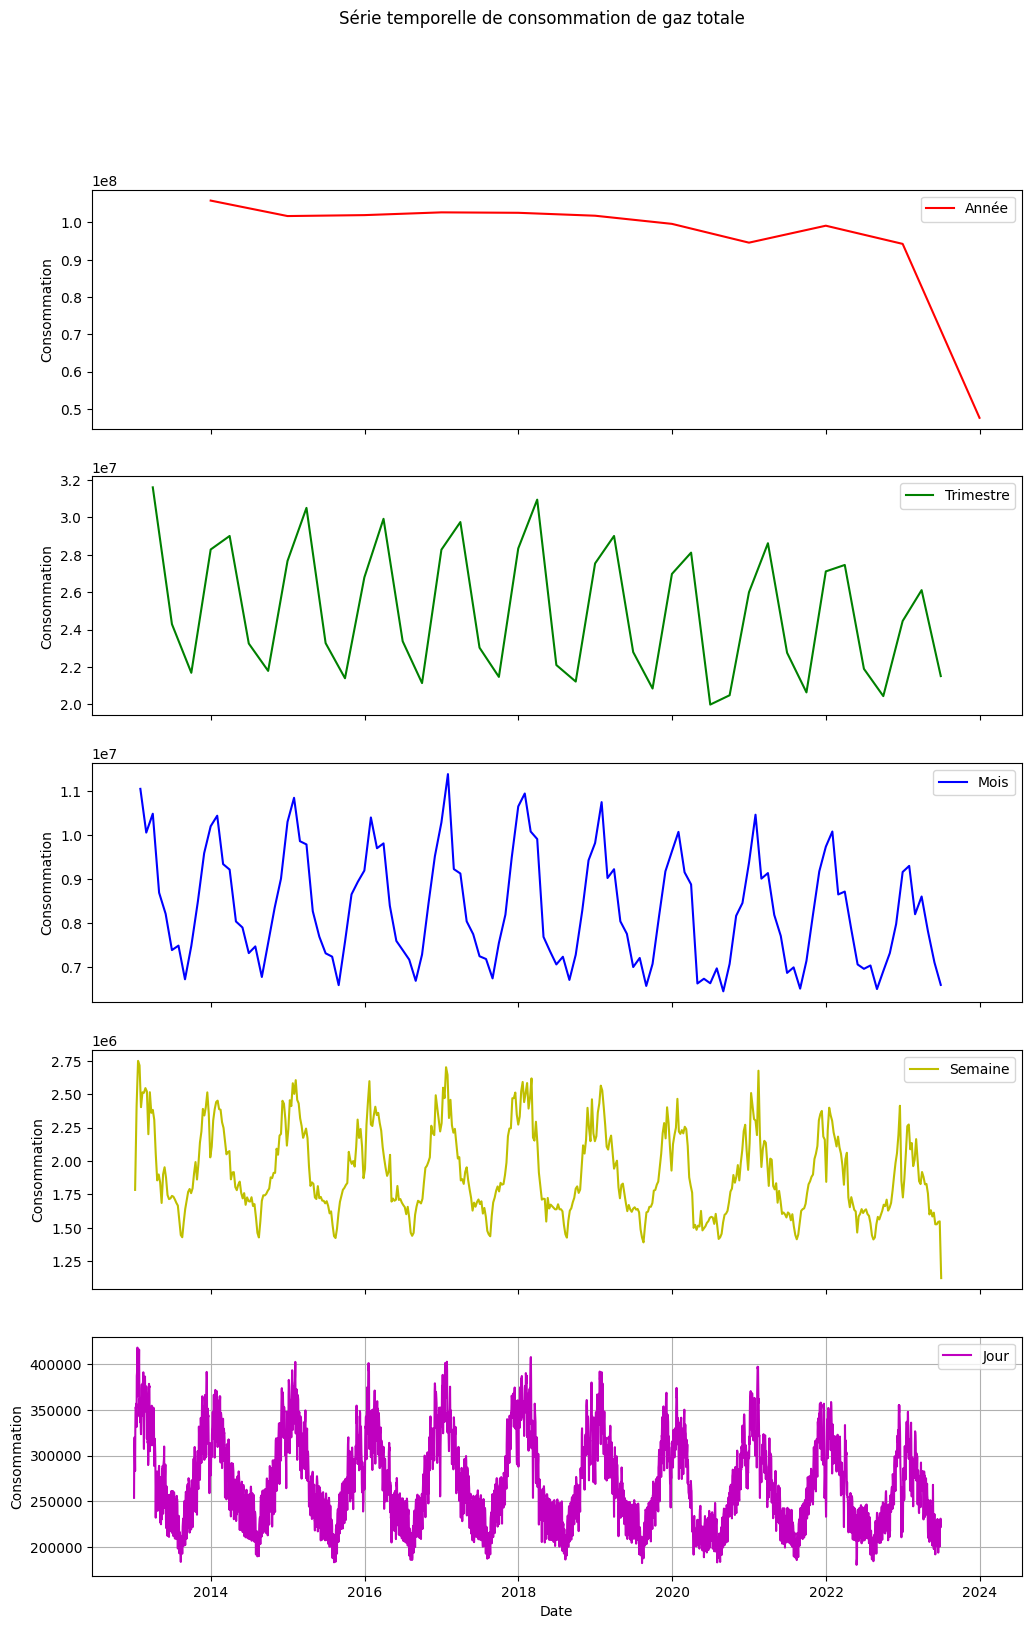

In [58]:
# Créer une figure avec plusieurs sous-graphiques
fig, axs = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

# Série temporelle par année
axs[0].plot(df_yearly.index, df_yearly, label='Année', color='r')
axs[0].set_ylabel('Consommation')
axs[0].legend()

# Série temporelle par trimestre
axs[1].plot(df_quarterly.index, df_quarterly, label='Trimestre', color='g')
axs[1].set_ylabel('Consommation')
axs[1].legend()

# Série temporelle par mois
axs[2].plot(df_monthly.index, df_monthly, label='Mois', color='b')
axs[2].set_ylabel('Consommation')
axs[2].legend()

# Série temporelle par semaine
axs[3].plot(df_weekly.index, df_weekly, label='Semaine', color='y')
axs[3].set_ylabel('Consommation')
axs[3].legend()

# Série temporelle par jour
axs[4].plot(df_daily.index, df_daily, label='Jour', color='m')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('Consommation')
axs[4].legend()

# Titre global
plt.suptitle('Série temporelle de consommation de gaz totale')

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.show()

## 3. A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

<Axes: xlabel='date'>

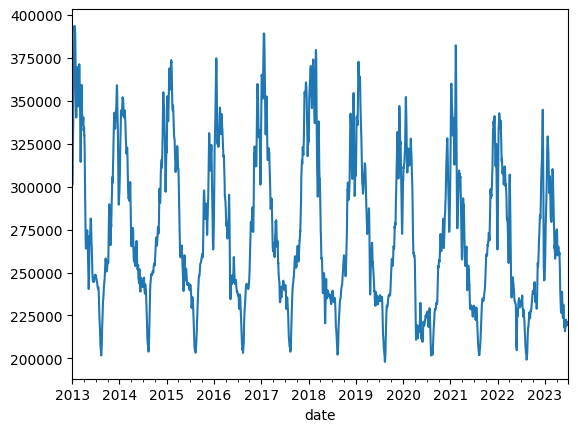

In [70]:
# Agréger par jour (vous avez déjà fait cela)
df_daily = df['consommation_brute_electricite_rte'].resample('D').sum()

# Créer une moyenne mobile sur une semaine centrée et symétrique
df_daily.rolling(window=7, center=True, win_type=None).mean().plot()

# # Créer une figure
# plt.figure(figsize=(12, 6))

# # Tracer la série temporelle agrégée à la journée
# plt.plot(df_daily.index, df_daily, label='Consommation quotidienne', color='b')

# # Tracer la moyenne mobile sur une semaine
# plt.plot(rolling_weekly_mean.index, rolling_weekly_mean, label='Moyenne mobile sur 1 semaine', color='r')

# # Ajouter des légendes
# plt.xlabel('Date')
# plt.ylabel('Consommation')
# plt.title('Série temporelle de consommation de gaz totale et moyenne mobile sur 1 semaine')
# plt.legend()

# # Afficher la grille
# plt.grid(True)

# # Afficher le graphique
# plt.show()

## 4. Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

Agrégation par semaine : Cette approche agrège les données à une échelle hebdomadaire, ce qui permet de voir les variations brutes de la consommation d'une semaine à l'autre. Cela peut aider à repérer des motifs hebdomadaires ou saisonniers, mais ne lisse pas les variations à court terme.

Moyenne mobile sur une semaine : Cette méthode lisse les données en calculant la moyenne sur une fenêtre de 7 jours, ce qui réduit les variations à court terme et met davantage en évidence les tendances à plus long terme. Cela peut être utile pour identifier des tendances ou des cycles plus subtils qui pourraient ne pas être visibles dans les données brutes.

Correction: Dans la moyenne mobile, chaque point est calculée avec les points autour de lui alors qu'avec l'agrégation on perd beaucoup d'informations étant donné que les points sont rassemblés. 

Les deux servent à lisser les séries temporelles et lisser la saisonnalité. 

## 5. A l’aide de box-plots, observez la saisonnalité: trimestrielle (chaque trimestre) / mensuelle (chaque mois) / hebdomadaire (chaque jour) / journalière (chaque heure)

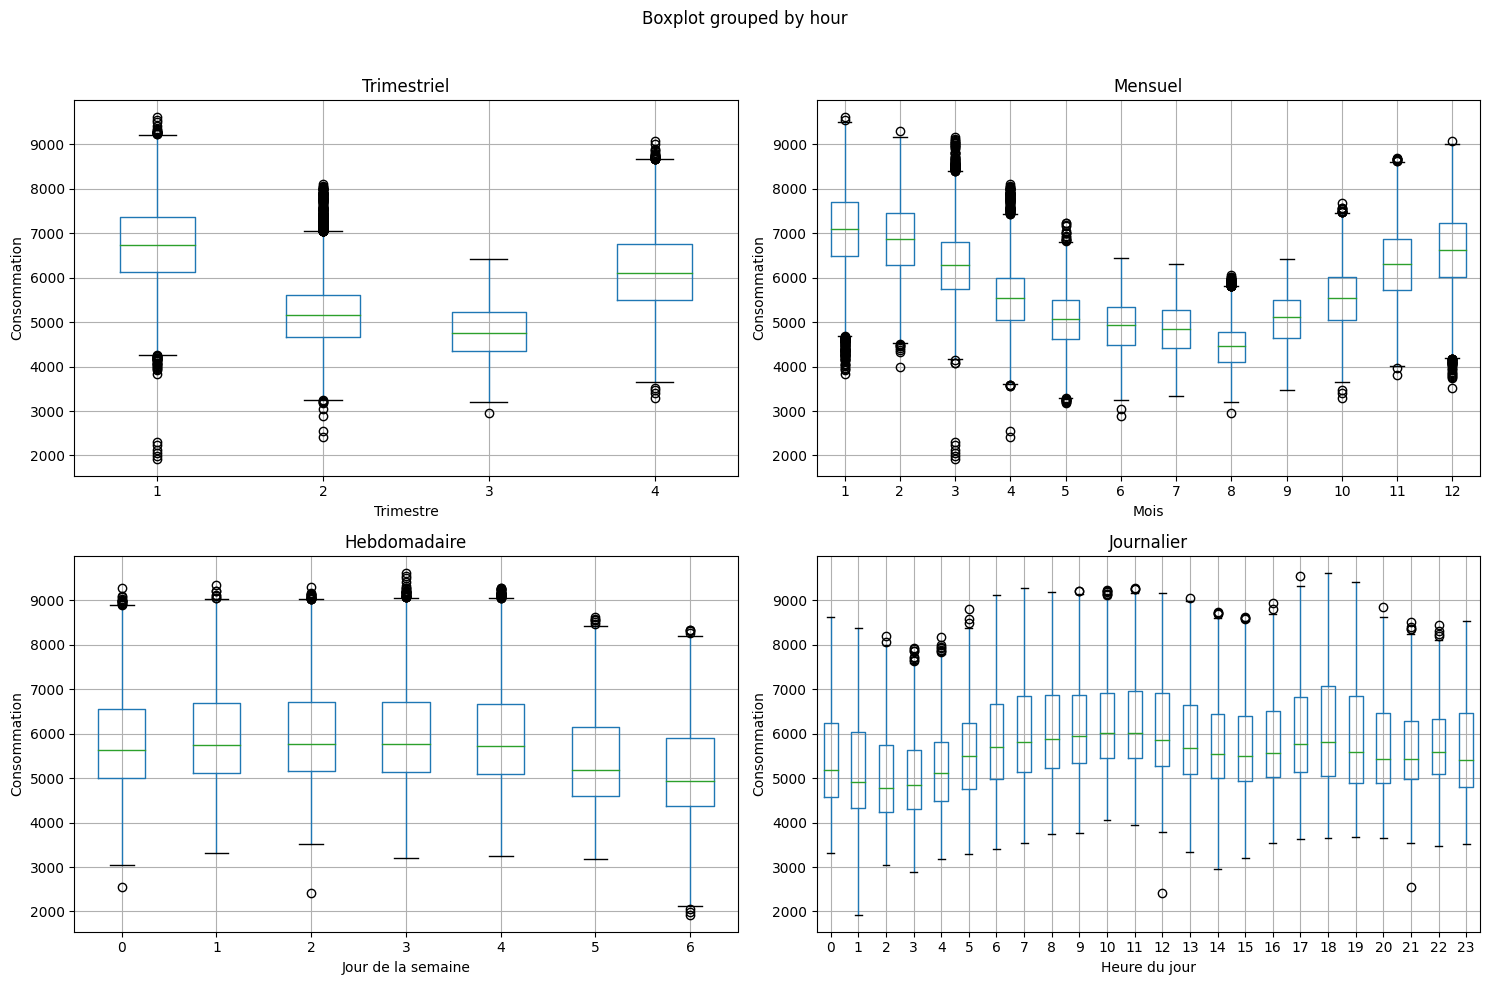

In [60]:
df_haut_de_france['date_heure'] = pd.to_datetime(df_haut_de_france['date_heure'], utc=True)

# Créer une figure avec des sous-graphiques
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Saisonnalité de la consommation électrique')

# Box-plot trimestriel
df_haut_de_france['quarter'] = df_haut_de_france['date_heure'].dt.quarter
df_haut_de_france.boxplot(column='consommation_brute_electricite_rte', by='quarter', ax=axs[0, 0])
axs[0, 0].set_title('Trimestriel')
axs[0, 0].set_xlabel('Trimestre')
axs[0, 0].set_ylabel('Consommation')

# Box-plot mensuel
df_haut_de_france['month'] = df_haut_de_france['date_heure'].dt.month
df_haut_de_france.boxplot(column='consommation_brute_electricite_rte', by='month', ax=axs[0, 1])
axs[0, 1].set_title('Mensuel')
axs[0, 1].set_xlabel('Mois')
axs[0, 1].set_ylabel('Consommation')

# Box-plot hebdomadaire
df_haut_de_france['weekday'] = df_haut_de_france['date_heure'].dt.weekday
df_haut_de_france.boxplot(column='consommation_brute_electricite_rte', by='weekday', ax=axs[1, 0])
axs[1, 0].set_title('Hebdomadaire')
axs[1, 0].set_xlabel('Jour de la semaine')
axs[1, 0].set_ylabel('Consommation')

# Box-plot journalier
df_haut_de_france['hour'] = df_haut_de_france['date_heure'].dt.hour
df_haut_de_france.boxplot(column='consommation_brute_electricite_rte', by='hour', ax=axs[1, 1])
axs[1, 1].set_title('Journalier')
axs[1, 1].set_xlabel('Heure du jour')
axs[1, 1].set_ylabel('Consommation')

# Supprimer les colonnes temporaires
df_haut_de_france = df_haut_de_france.drop(['quarter', 'month', 'weekday', 'hour'], axis=1)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Afficher les box-plots
plt.show()

## 6. Qu’est ce que la stationnarité? 

Une série temporelle est considérée comme stationnaire si ses propriétés statistiques, telles que la moyenne, la variance et la corrélation, restent constantes dans le temps. En d'autres termes, la stationnarité signifie que la série ne présente pas de tendances significatives, de variations saisonnières ou de cycles qui évoluent au fil du temps.
Stationnaire = pas de trend, pas de saison

## 7. Visuellement, pour vous la time serie est-elle stationnaire ou non stationnaire? 

Visuellement, la time serie est non stationnaire étant donné qu'elle présente des tendances, une saisonnalité à différentes échelles de temps. 

In [61]:
df_daily_mean 

date
2013-01-01    5400.617021
2013-01-02    6428.812500
2013-01-03    6664.750000
2013-01-04    6666.875000
2013-01-05    6213.104167
                 ...     
2023-06-26    4575.020833
2023-06-27    4620.229167
2023-06-28    4764.916667
2023-06-29    4813.354167
2023-06-30    4630.250000
Freq: D, Name: consommation_brute_electricite_rte, Length: 3833, dtype: float64

## 8. Réalisez un test de Dickey Fuller, quelle est l’hypothèse nulle et l’hypothèse alternative, quelle est la statistique calculée et quelle distribution théorique suit elle d’après l’hypothèse nulle. Quelle est la probabilité que la statistique sous l’hypothèse H0 prenne une valeur aussi extrême voir plus extrême? 

In [62]:
from statsmodels.tsa.stattools import adfuller, kpss
# Supprimer les lignes avec des valeurs manquantes (NaN)
df_daily_mean_cleaned = df_daily_mean.dropna()

# Remplacer les valeurs infinies (inf) par des zéros
df_daily_mean_cleaned = df_daily_mean_cleaned.replace([np.inf, -np.inf], 0)

# Réexécutez le test Dickey-Fuller avec la série temporelle nettoyée
result_adf = adfuller(df_daily_mean_cleaned)
adf_statistic = result_adf[0]
p_value = result_adf[1]
critical_values = result_adf[4]

# Imprimez les résultats
print(f'Statistique de test ADF : {adf_statistic}')
print(f'P-value : {p_value}')
print(f'Valeurs critiques : {critical_values}')

Statistique de test ADF : -4.231797048300965
P-value : 0.0005818308009864074
Valeurs critiques : {'1%': -3.4320711258652885, '5%': -2.862300498788623, '10%': -2.5671748234670364}


Les valeurs obtenues indiquent fortement que la série temporelle est stationnaire, car la statistique ADF est très négative, la p-value est proche de zéro et la statistique est en dehors des valeurs critiques. Cela renforce l'hypothèse alternative de stationnarité de la série.

In [63]:
# Effectuez le test KPSS
result_kpss = kpss(df_daily_mean_cleaned)
kpss_statistic = result_kpss[0]
kpss_p_value = result_kpss[1]
kpss_critical_values = result_kpss[3]

# Imprimez les résultats
print(f'Statistique de test KPSS : {kpss_statistic}')
print(f'P-value : {kpss_p_value}')
print(f'Valeurs critiques :')
for key, value in kpss_critical_values.items():
    print(f'{key}: {value}')

Statistique de test KPSS : 0.4932153994521093
P-value : 0.04319472985312854
Valeurs critiques :
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


## 10. Désaisonnalisez la composante annuelle de votre time série est utilisez à nouveau le test de Dickey Fuller. Que comprenez vous de ce résultat?

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Désaisonnalisez la série temporelle en décomposant la composante annuelle
decomposed = seasonal_decompose(df_daily_mean_cleaned, model='additive', period=365)

# Extrait la série temporelle désaisonnalisée
df_deseasonalized = df_daily_mean_cleaned - decomposed.seasonal

# Réexécutez le test de Dickey-Fuller sur la série désaisonnalisée
result_adf_deseasonalized = adfuller(df_deseasonalized)
adf_statistic_deseasonalized = result_adf_deseasonalized[0]
adf_p_value_deseasonalized = result_adf_deseasonalized[1]
adf_critical_values_deseasonalized = result_adf_deseasonalized[4]

# Imprimez les résultats du test de Dickey-Fuller sur la série désaisonnalisée
print("Résultats après désaisonnalisation avec le test de Dickey-Fuller :")
print(f'Statistique de test ADF : {adf_statistic_deseasonalized}')
print(f'P-value : {adf_p_value_deseasonalized}')
print(f'Valeurs critiques :')
for key, value in adf_critical_values_deseasonalized.items():
    print(f'{key}: {value}')

Résultats après désaisonnalisation avec le test de Dickey-Fuller :
Statistique de test ADF : -5.40348050015808
P-value : 3.330653154500707e-06
Valeurs critiques :
1%: -3.432070220350364
5%: -2.862300098792306
10%: -2.567174610523982


## 11. Sur la time serie désaisonnalisée, réalisez à nouveau un test de KPSS. Que peut-on en conclure?

In [65]:
# Effectuez le test KPSS sur la série désaisonnalisée
result_kpss_deseasonalized = kpss(df_deseasonalized)
kpss_statistic_deseasonalized = result_kpss_deseasonalized[0]
kpss_p_value_deseasonalized = result_kpss_deseasonalized[1]
kpss_critical_values_deseasonalized = result_kpss_deseasonalized[3]

# Imprimez les résultats du test KPSS sur la série désaisonnalisée
print("Résultats du test KPSS sur la série désaisonnalisée :")
print(f'Statistique de test KPSS : {kpss_statistic_deseasonalized}')
print(f'P-value : {kpss_p_value_deseasonalized}')
print(f'Valeurs critiques :')
for key, value in kpss_critical_values_deseasonalized.items():
    print(f'{key}: {value}')


Résultats du test KPSS sur la série désaisonnalisée :
Statistique de test KPSS : 5.010567113817641
P-value : 0.01
Valeurs critiques :
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


/tmp/ipykernel_25169/867820899.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss_deseasonalized = kpss(df_deseasonalized)


## 12. Pour vous la série temporelle est plutôt additive ou multiplicative? 

Le série temporelle est additive.

multiplicative : y = base x trend x saison x bruit /
additive : y = base + trend + saison + bruit 

Ligne parallèle : additive / 
Ligne en entonoir : multiplicative